In [2]:
# Python has a couple of built-in functions and methods for sorting lists and other
# iterable objects. The sorted function accepts a list and returns a sorted version of it:
L = [3, 1, 4, 1, 5, 9, 2, 6]
sorted(L) # returns a sorted copy

[1, 1, 2, 3, 4, 5, 6, 9]

In [3]:
L.sort()  # Act in place and returns nonw
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]


In [4]:
sorted('python')

['h', 'n', 'o', 'p', 't', 'y']

1. Fast Sorting in NumPy: np.sort and np.argsort

In [5]:
import numpy as np

x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [6]:
x.sort()
print(x)

[1 2 3 4 5]


In [9]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [10]:
x[i]

array([1, 2, 3, 4, 5])

2. Sorting along rows or columns

In [11]:
rng = np.random.default_rng(seed=42)
X = rng.integers(0, 10, (4, 6))
print(X)

[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]


In [12]:
# sort each column of X
np.sort(X, axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]])

In [13]:
# sort each row of X
np.sort(X, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

3. Partial Sorts: Partitioning. 
Sometimes we’re not interested in sorting the entire array, but simply want to find the
k smallest values in the array. NumPy enables this with the np.partition function.
np.partition takes an array and a number k; the result is a new array with the small‐
est k values to the left of the partition and the remaining values to the right:

In [ ]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
print("Original:", x)
print("Partitioned:", np.partition(x, 3))
print("Sorted:", np.sort(x))

Original: [7 2 3 1 6 5 4]
Partitioned: [1 2 3 4 5 6 7]
Sorted: [1 2 3 4 5 6 7]


In [16]:
np.partition(X, 2, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

In [19]:
# Example: k-Nearest Neighbors

In [28]:
X = rng.random((10, 2)) # 10 points in 2D
# Generates a 10×2 array of random numbers between 0 and 1, representing 10 points in 2D space.

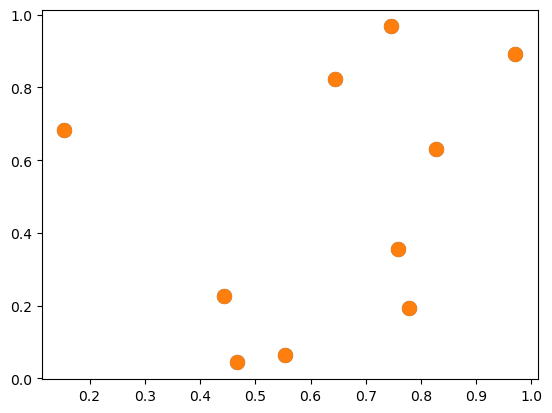

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], s= 100);
plt.show();
#plt.scatter(X[:, 0], X[:, 1], s=100): Plots the points.

# X[:, 0]: all x-coordinates

# X[:, 1]: all y-coordinates

# s=100: size of the points

In [ ]:
# Compute the squared distances between each pair of points
# Broadcasting: (10, 1, 2) - (1, 10, 2) → (10, 10, 2)
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
# Square and sum over last dimension (coordinates)
dist_sq = np.sum(differences**2, axis=-1)

# X[:, np.newaxis, :]: reshapes X from (10, 2) → (10, 1, 2)

# X[np.newaxis, :, :]: reshapes X to (1, 10, 2)

# Subtracting these uses broadcasting to compute the vector difference between every pair of points, resulting in shape (10, 10, 2), where the [i, j, :] slice is the vector from point j to point i.

print(dist_sq.diagonal())  # Should be all zeros


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
# Find nearest neighbors using full sorting (argsort)
nearest = np.argsort(dist_sq, axis=1)
print("Nearest neighbors by full sort:\n", nearest)


Nearest neighbors by full sort:
 [[0 9 3 5 4 8 1 6 2 7]
 [1 7 2 6 4 8 3 0 9 5]
 [2 7 1 6 4 3 8 0 9 5]
 [3 0 4 5 9 6 1 2 8 7]
 [4 6 3 1 2 7 0 5 9 8]
 [5 9 3 0 4 6 8 1 2 7]
 [6 4 2 1 7 3 0 5 9 8]
 [7 2 1 6 4 3 8 0 9 5]
 [8 0 1 9 3 4 7 2 6 5]
 [9 0 5 3 4 8 6 1 2 7]]


In [26]:
# Find nearest neighbors efficiently using partial sorting (argpartition)
K = 2  # Number of nearest neighbors desired
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)
print("Nearest neighbors by partial sort (unsorted within top K+1):\n", nearest_partition)


Nearest neighbors by partial sort (unsorted within top K+1):
 [[0 9 3 5 4 8 1 6 2 7]
 [1 7 2 6 4 8 3 0 9 5]
 [2 7 1 6 4 3 8 0 9 5]
 [3 0 4 5 9 6 1 2 8 7]
 [4 6 3 1 2 7 0 5 9 8]
 [5 9 3 0 4 6 8 1 2 7]
 [6 4 2 1 7 3 0 5 9 8]
 [7 2 1 6 4 3 8 0 9 5]
 [8 0 1 9 3 4 7 2 6 5]
 [9 0 5 3 4 8 6 1 2 7]]


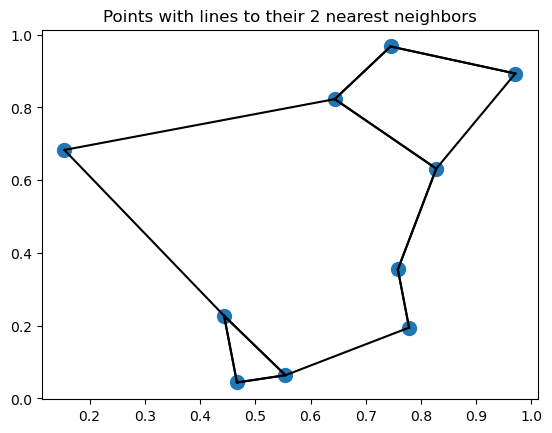

In [27]:
# Plot points with lines to their K nearest neighbors
plt.scatter(X[:, 0], X[:, 1], s=100)

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[i], X[j]), color='black')

plt.title(f"Points with lines to their {K} nearest neighbors")
plt.show()
